## UPLOAD FILE


In [ ]:
from google.colab import files
import os
import matplotlib.pyplot as plt

# Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Display the current working directory
print("\nCurrent Working Directory:", os.getcwd())


## Question 1: Determine the blank values in the data

In [ ]:
import os
import pandas as pd
from tabulate import tabulate

# File name
file_name = "titanic.csv"

# Check if the file exists in the current working directory
if file_name in os.listdir():

    # Load dataset
    df = pd.read_csv(file_name)

    # Display the first few rows in a formatted table
    print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))





╒════╤═══════════════╤════════════╤══════════╤═════════════════════════════════════════════════════╤════════╤═══════╤═════════╤═════════╤══════════════════╤═════════╤═════════╤════════════╕
│    │   PassengerId │   Survived │   Pclass │ Name                                                │ Sex    │   Age │   SibSp │   Parch │ Ticket           │    Fare │ Cabin   │ Embarked   │
╞════╪═══════════════╪════════════╪══════════╪═════════════════════════════════════════════════════╪════════╪═══════╪═════════╪═════════╪══════════════════╪═════════╪═════════╪════════════╡
│  0 │             1 │          0 │        3 │ Braund, Mr. Owen Harris                             │ male   │    22 │       1 │       0 │ A/5 21171        │  7.25   │ nan     │ S          │
├────┼───────────────┼────────────┼──────────┼─────────────────────────────────────────────────────┼────────┼───────┼─────────┼─────────┼──────────────────┼─────────┼─────────┼────────────┤
│  1 │             2 │          1 │        1 │ Cum

## Question 2: Determine the task for loading of handling the data

In [ ]:
from tabulate import tabulate
import io

# Capture dataset info as a string
buffer = io.StringIO()
df.info(buf=buffer)
dataset_info = buffer.getvalue()

# Convert dataset info into a structured table format
dataset_info_lines = dataset_info.split("\n")
dataset_info_table = [line.split(":") for line in dataset_info_lines if ":" in line]

# Display dataset overview in a formatted table
print("\n📊 DATASET OVERVIEW:\n")
if dataset_info_table:
    print(tabulate(dataset_info_table, tablefmt="fancy_grid"))
else:
    print("No detailed dataset info available.")

# Capture dataset info as a string
buffer = io.StringIO()
df.info(buf=buffer)
dataset_info = buffer.getvalue()

# Convert summary statistics to a table format
summary_stats = df.describe().reset_index()

# Check for missing values and filter only columns with missing data
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].reset_index()
missing_values.columns = ["Column", "Missing Values"]

# Display dataset summary statistics in a formatted table
print("\n📈 STATISTICAL SUMMARY:\n")
print(tabulate(summary_stats, headers="keys", tablefmt="fancy_grid"))

# Display missing values in a formatted table (same style as the summary table)
if not missing_values.empty:
    print("\n🚨 MISSING VALUES PER COLUMN:\n")
    print(tabulate(missing_values, headers="keys", tablefmt="fancy_grid"))



📊 DATASET OVERVIEW:

╒═════════════════════════════════╤═════════════════════════════════╕
│ RangeIndex                      │ 891 entries, 0 to 890           │
├─────────────────────────────────┼─────────────────────────────────┤
│ Data columns (total 12 columns) │                                 │
├─────────────────────────────────┼─────────────────────────────────┤
│ dtypes                          │ float64(2), int64(5), object(5) │
├─────────────────────────────────┼─────────────────────────────────┤
│ memory usage                    │ 83.7+ KB                        │
╘═════════════════════════════════╧═════════════════════════════════╛

📈 STATISTICAL SUMMARY:

╒════╤═════════╤═══════════════╤════════════╤════════════╤══════════╤════════════╤════════════╤══════════╕
│    │ index   │   PassengerId │   Survived │     Pclass │      Age │      SibSp │      Parch │     Fare │
╞════╪═════════╪═══════════════╪════════════╪════════════╪══════════╪════════════╪════════════╪══════════╡
│ 

## Question 3: Determine the Survival Rate

In [ ]:


# Calculate the mean survival rate
mean_survival_rate = df["Survived"].mean()

# Display the result with formatting
print("\n📊 SURVIVAL RATE ANALYSIS")
print("──────────────────────────────")
print(f"✅ Mean Survival Rate: {mean_survival_rate:.2%}")  # Converts to percentage format
print("──────────────────────────────")


📊 SURVIVAL RATE ANALYSIS
──────────────────────────────
✅ Mean Survival Rate: 38.38%
──────────────────────────────


## Question 4: Determine the Average age of Survivors




<ipython-input-108-15c5b2595425>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = df.groupby("Age Group")["Survived"].value_counts().unstack()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


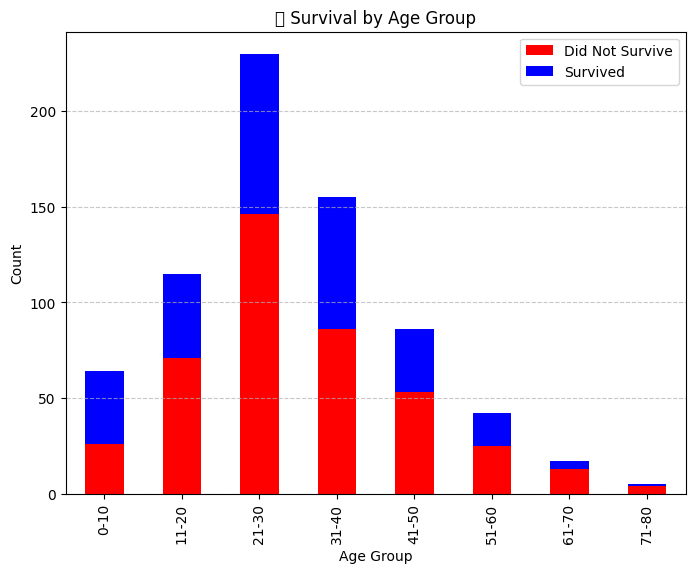


📊 AGE-BASED SURVIVAL ANALYSIS
──────────────────────────────────────────
✅ Average Age of Survivors: 28.34 years
❌ Average Age of Non-Survivors: 30.63 years
──────────────────────────────────────────


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Define age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Age ranges
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

# Create a new column for Age Groups
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Count the number of survivors and non-survivors in each age group
age_survival_counts = df.groupby("Age Group")["Survived"].value_counts().unstack()

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
age_survival_counts.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax)

# Add labels and title
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
ax.set_title("📊 Survival by Age Group")

# Add grid lines between age groups
ax.yaxis.grid(True, linestyle="--", alpha=0.7)  # Dashed grid lines for clarity

# Add a legend
ax.legend(["Did Not Survive", "Survived"], loc="upper right")

# Show the plot
plt.show()
# Compute average age of survivors and non-survivors
average_age_survivors = df[df["Survived"] == 1]["Age"].mean()
average_age_non_survivors = df[df["Survived"] == 0]["Age"].mean()

# Display results with a stylish format
print("\n📊 AGE-BASED SURVIVAL ANALYSIS")
print("──────────────────────────────────────────")
print(f"✅ Average Age of Survivors: {average_age_survivors:.2f} years")
print(f"❌ Average Age of Non-Survivors: {average_age_non_survivors:.2f} years")
print("──────────────────────────────────────────")
